In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_date'] = df['job_posted_date'].dt.date
import ast
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\foranac\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
sns.set_style('ticks')

In [ ]:
df_DA_Irl = df[df['job_title_short'].isin(['Data Analyst', 'Senior Data Analyst'])]
df_DA_Irl = df_DA_Irl[df_DA_Irl['job_country']== 'Ireland']
df_DA_Irl_exp = df_DA_Irl.explode('job_skills')
df_DA_Irl_exp['Month'] = pd.to_datetime(df_DA_Irl_exp['job_posted_date']).dt.strftime('%B')

In [13]:
df_DA_Irl_exp['month_no'] = pd.to_datetime(df_DA_Irl_exp['job_posted_date']).dt.month
jobs_total = df_DA_Irl_exp.groupby('Month').size().to_frame(name='count').reset_index()
jobs_total['Number'] = pd.to_datetime(jobs_total['Month'], format= '%B').dt.month
jobs_total = jobs_total.sort_values('Number', ascending= True)
jobs_total = jobs_total.drop(columns='Number')
jobs_total = jobs_total.set_index('Month')





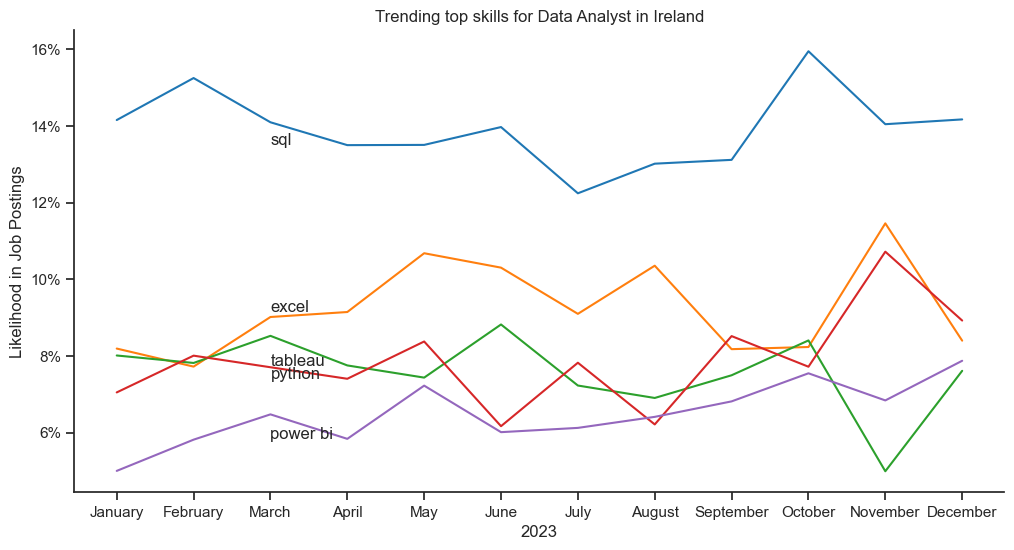

In [127]:

df_DA_Irl_exp['Month'] = pd.to_datetime(df_DA_Irl_exp['job_posted_date']).dt.strftime('%B')
df_pivot = df_DA_Irl_exp.pivot_table(columns='job_skills',index='Month',aggfunc='size',fill_value=0)
df_pivot.reset_index(inplace=True)
df_pivot['month_no'] = pd.to_datetime(df_pivot['Month'],format='%B').dt.month
df_pivot = df_pivot.sort_values(by='month_no', ascending= True)
df_pivot.set_index('Month', inplace= True)
df_pivot = df_pivot.drop(columns='month_no')
df_pivot.loc['counts']  = df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['counts'].sort_values(ascending= False).index]
df_pivot = df_pivot.drop(index='counts')
df_pivot = df_pivot.div(jobs_total['count']/100, axis=0)
df_pivot = df_pivot.iloc[:, :5]
sns.lineplot(data=df_pivot, dashes= False, palette= 'tab10')
plt.rcParams['figure.figsize'] = (12,6)
sns.set_theme(style='ticks')
plt.ylabel('Likelihood in Job Postings')
plt.xlabel('2023')
plt.title('Trending top skills for Data Analyst in Ireland')
plt.legend().remove()
sns.despine()
ax = plt.gca()
from matplotlib.ticker import PercentFormatter 
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
for i in range(5):
    plt.text(2,df_pivot.iloc[3,i], df_pivot.columns[i])
plt.show()